
*Note:* You can run this from your computer (Jupyter or terminal), or using Binder (does not require any installation, takes a few minutes to be ready)

[![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fml-basic%252FREADME.ipynb%26branch%3Dmaster)


# Basic ML project

Machine Learning pipeline.

## Setup

(**Note**: Skip if running in Binder)

~~~bash
# if using conda
conda env create --file environment.yml
conda activate ml-basic

# or use pip directly
pip install -r requirements.txt
~~~

## Description

Let's take a look at the `pipeline.yaml`:

In [1]:
%%sh
cat pipeline.yaml

# # enable client if you want to upload arfifacts to google cloud storage
# # see clients.py for details
# clients:
#   File:
#     dotted_path: clients.get_storage_client
#     run_id: '{{run_id}}'

tasks:
    # tasks.get, features and join are python functions
  - source: tasks.get
    product: output/get.parquet

  - source: tasks.features
    product: output/features.parquet

  - source: tasks.join
    product: output/join.parquet

    # fit.py is a script executed as a notebook
  - source: fit.py
    name: fit
    product:
        nb: output/nb.ipynb
        model: output/model.pickle


Note that the first three tasks as Python functions, while the last one is a
script.

Generate the plot:

In [2]:
%%sh
ploomber plot

Plot saved at: pipeline.png


/Users/Edu/miniconda3/envs/projects/lib/python3.7/site-packages/ploomber/spec/dagspec.py:336: UserWarning: The following placeholders are declared in the environment but unused in the spec: {'run_id'}
  warnings.warn('The following placeholders are declared in the '
100%|██████████| 4/4 [00:00<00:00, 12166.22it/s]


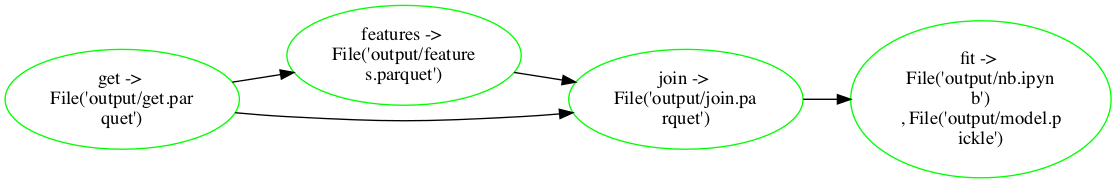

In [3]:

# If using jupyter, you can show the plot with this code:
from IPython.display import Image
Image(filename='pipeline.png')

# otherwise open the pipeline.png file directly

## Build pipeline

In [4]:
%%sh
ploomber build

name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
get       False               0             0
features  False               0             0
join      False               0             0
fit       False               0             0


/Users/Edu/miniconda3/envs/projects/lib/python3.7/site-packages/ploomber/spec/dagspec.py:336: UserWarning: The following placeholders are declared in the environment but unused in the spec: {'run_id'}
  warnings.warn('The following placeholders are declared in the '
0it [00:00, ?it/s]


Since the training task is a script, it will generate a Jupyter notebook at
[output/nb.ipynb](output/nb.ipynb) with evaluation charts.

## Interacting with the pipeline

The command line interface is a convenient way to interact with your
pipeline. Try this in a terminal:

~~~bash
ploomber interact
~~~